In [3]:
# Importing relevant python packages
import os#
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings 
warnings.filterwarnings('ignore')
np.random.seed(42)

print("All packages imported!")

plt.style.use('bmh')


All packages imported!


In [4]:
# reading air_store_data csv file into a dataframe

air_store_data = pd.read_csv(os.path.join(os.getcwd(), 'Data', 'air_store_info.csv'))


# Putting genres into arrays that specify their categories

bars_and_party_array = ["Bar/Cocktail", "Izakaya", "Dining bar", "Karaoke/Party"]
international_array = ["Italian/French", "Western food", "International cuisine","Creative cuisine", "Other"]
asian_array = ["Asian", 'Okonomiyaki/Monja/Teppanyaki', 'Japanese food', 'Yakiniku/Korean food']

# Defining function that will replace the values of air_genre_name with a single category. 
# The arrays above show the names that will be replaced 

def replace_for_df(dataframe, column_name, array, new_value):
    new_dataframe = dataframe
    for old_value in array:
        new_dataframe = new_dataframe.replace(to_replace ={column_name: old_value} , value = {column_name: new_value})
    
    return new_dataframe

# Using the above function to further categorise the restaurants into 'Bar/Party', 'International', 'Asian' and 'Cafe/Sweets'

edited_air_store_data = replace_for_df(air_store_data, 'air_genre_name', bars_and_party_array, 'Bar/Party')
edited_air_store_data = replace_for_df(edited_air_store_data, 'air_genre_name', international_array, 'International')
edited_air_store_data = replace_for_df(edited_air_store_data, 'air_genre_name', asian_array, 'Asian')

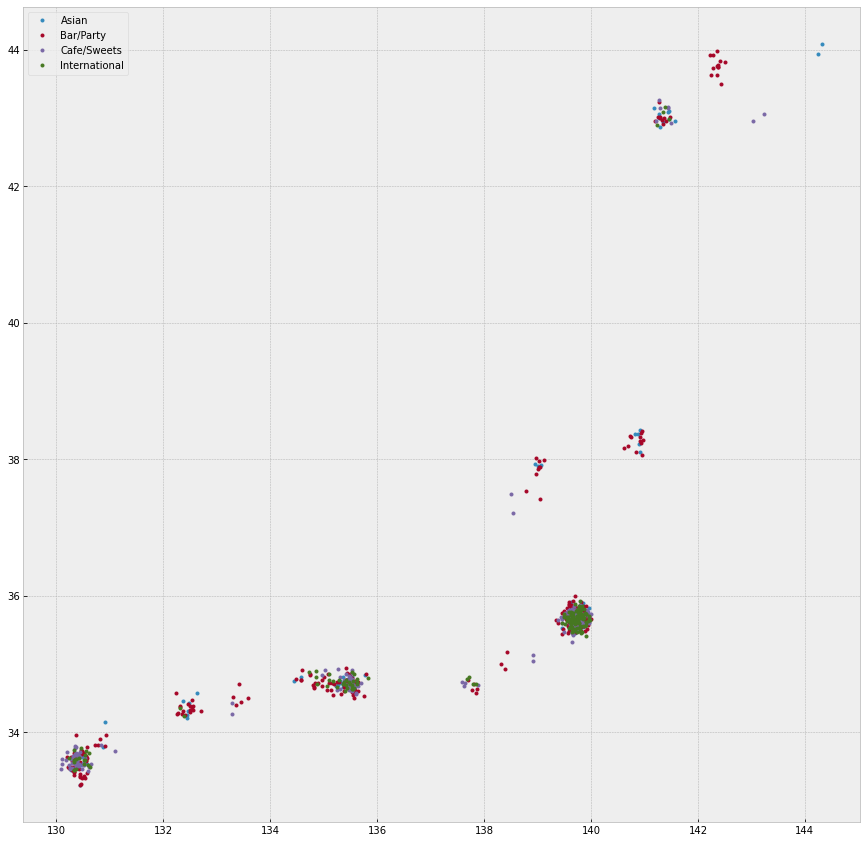

In [5]:
# Setting a 

noisy_air_store_data = edited_air_store_data.copy()
noise = np.random.normal(0,0.1, len(noisy_air_store_data))
noisy_air_store_data['latitude'] = noisy_air_store_data['latitude'] + noise
noise = np.random.normal(0,0.1, len(noisy_air_store_data))
noisy_air_store_data['longitude']  = noisy_air_store_data['longitude'] + noise

fig = plt.figure(figsize = (15,15))
axes = fig.add_subplot(1,1,1)

collapsed_air_store_data = noisy_air_store_data.groupby("air_genre_name")
       
for category_name, category_data in collapsed_air_store_data:
    
    axes.plot(category_data["longitude"], category_data["latitude"], marker=".", linestyle="", label= category_name)
    
plt.legend()

Looking at the data, there are a high density of restaurants across the main cities in Japan e.g. Kobe, Tokyo etc. Within cities, international restaurants are quite popular. This seems probable given that these are prominent tourists destinations, with tourists being interested in a variety of international cuisines. In the upper island of Japan however, and in other, more rural parts of Japan there are far more asian restaurants and bars/party venues, as these are smaller towns in which the population mainly consists of Japanese natives. There are also a few cafes and sweet shops in these rural areas too, implying that these are local towns which are not as popular for tourists.